![Figura 1](Fig/model1.jpg)

\begin{gather*} 
\frac{dCa}{dt}=\frac{q}{V}*(Ca_f-Ca)-k_0*Ca*exp^\frac{-E*R}{T}\\
\frac{dT}{dt}=\frac{q}{V}*(T_f-T)-\frac{\Delta{h}}{\rho*Cp}*k_0*Ca*exp^\frac{-E*R}{T}
\end{gather*} 

In [2]:
""" CSTR model from

Michael A. Henson and Dale E. Seborg.  Nonlinear Process Control.
Prentice Hall PTR, Upper Saddle River, New Jersey, 1997.

Description:
Continuously Stirred Tank Reactor with energy balance and reaction A->B.
The temperature of the cooling jacket is the control."""

function cstr1(t,x,dx)
# Input (1):
# Temperature of cooling jacket (K)
Tc = u

# States (2):
# Concentration of A in CSTR (mol/m^3)
Ca = x[1]
# Temperature in CSTR (K)
T = x[2]

# Parameters:
# Volumetric Flowrate (m^3/sec)
q = 100
# Volume of CSTR (m^3)
V = 100
# Density of A-B Mixture (kg/m^3)
rho = 1000
# Heat capacity of A-B Mixture (J/kg-K)
Cp = .239
# Heat of reaction for A->B (J/mol)
mdelH = 5e4
# E - Activation energy in the Arrhenius Equation (J/mol)
# R - Universal Gas Constant = 8.31451 J/mol-K
EoverR = 8750
# Pre-exponential factor (1/sec)
k0 = 7.2e10
# U - Overall Heat Transfer Coefficient (W/m^2-K)
# A - Area - this value is specific for the U calculation (m^2)
UA = 5e4
# Feed Concentration (mol/m^3)
Caf = 1
# Feed Temperature (K)
Tf = 350

# Compute ODEs:
dx[1] = (q/V*(Caf - Ca) - k0*exp(-EoverR/T)*Ca)
dx[2] = (q/V*(Tf - T) + mdelH/(rho*Cp)*k0*exp(-EoverR/T)*Ca + UA/V/rho/Cp*(Tc-T))
end

cstr1


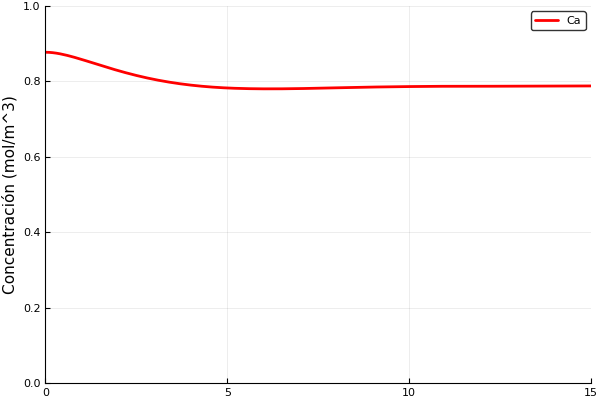

In [9]:
using DifferentialEquations
using Plots
using LaTeXStrings
pyplot()

# Step test for Model 1 - CSTR
# Created by Kelvyn - Liliana

# Steady State Initial Conditions for the States
Ca_ss = 0.87725294608097
T_ss = 324.475443431599
x_ss = [Ca_ss;T_ss]

# Steady State Initial Condition for the Control
u_ss = 300

# Open Loop Step Change
u = 303

# Final Time (sec)
tf = 15.0

tspan = (0.0,tf)
prob = ODEProblem(cstr1,x_ss,tspan)
sol = solve(prob, DP5(),saveat=0.1)

# Parse out the state values
Ca = sol[1,:]
T = sol[2,:]

# Plot the results
p1 = plot(sol.t,Ca,label="Ca",lw=2,linecolor=:red,
        ylabel="Concentración (mol/m^3)",ylims=(0,1))
#plot!(sol.t,sol[2,:],label="Ca",lw=2,linecolor=:red,
 #       ylabel="Temperatura (°C)")

In [ ]:
cstr1